In [128]:
from matplotlib import pyplot as plt

In [129]:
#!conda install sklearn 
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

#DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [130]:
# !conda install tensorflow
# import tensorflow as tf
import numpy as np
import pandas as pd 

In [ ]:
#import sklearn

In [ ]:
# !conda install keras
# from keras.models import Sequential
# from keras.layers import GRU, Dense
# from keras.layers import LSTM
# from keras  import callbacks
# from keras import optimizers



In [131]:
df1 = pd.read_csv(r'D:/AIML/Fine_2014_2019_Finger_millet_Min_Blore_Mysore.csv')
df1.head()

,district,commodity,Arrival Date,variety,Min_price
0,Mysore,Ragi (Finger Millet),02-01-14,Fine,1600
1,Mysore,Ragi (Finger Millet),03-01-14,Fine,2000
2,Mysore,Ragi (Finger Millet),04-01-14,Fine,1800
3,Mysore,Ragi (Finger Millet),07-01-14,Fine,2000
4,Mysore,Ragi (Finger Millet),08-01-14,Fine,2100


In [132]:
gp = pd.pivot_table(df1,values='Min_price',columns=['district','commodity'],index=['Arrival Date'])
gp.head()

district,Bangalore,Mysore
commodity,Ragi (Finger Millet),Ragi (Finger Millet)
Arrival Date,,
01-01-15,1900,1900
01-01-16,1800,1800
01-01-18,2800,2800
01-01-19,2800,2800
01-02-15,1900,1900


In [133]:
flattened = pd.DataFrame(gp.to_records())
flattened['Arrival Date'] = pd.to_datetime(flattened['Arrival Date'])
flattened = flattened.sort_values(by=['Arrival Date'])
df = flattened.reset_index()
del df['index']
df.head()

,Arrival Date,"('Bangalore', 'Ragi (Finger Millet)')","('Mysore', 'Ragi (Finger Millet)')"
0,2014-01-03,1800,1800
1,2014-01-04,1800,1800
2,2014-01-06,1800,1800
3,2014-01-07,1700,1700
4,2014-01-08,1850,1850


In [134]:
df1 = df.set_index('Arrival Date').asfreq('D')
df1.head(10)

,"('Bangalore', 'Ragi (Finger Millet)')","('Mysore', 'Ragi (Finger Millet)')"
Arrival Date,,
2014-01-03,1800.0,1800.0
2014-01-04,1800.0,1800.0
2014-01-05,NaN,NaN
2014-01-06,1800.0,1800.0
2014-01-07,1700.0,1700.0
2014-01-08,1850.0,1850.0
2014-01-09,1700.0,1700.0
2014-01-10,1850.0,1850.0
2014-01-11,NaN,NaN


In [135]:
ndf = df1.fillna(method='ffill')
df1.head(10)

,"('Bangalore', 'Ragi (Finger Millet)')","('Mysore', 'Ragi (Finger Millet)')"
Arrival Date,,
2014-01-03,1800.0,1800.0
2014-01-04,1800.0,1800.0
2014-01-05,NaN,NaN
2014-01-06,1800.0,1800.0
2014-01-07,1700.0,1700.0
2014-01-08,1850.0,1850.0
2014-01-09,1700.0,1700.0
2014-01-10,1850.0,1850.0
2014-01-11,NaN,NaN


In [136]:
ndf.to_csv(r'D:/AIML/Fine_2014_2019_Finger_millet_Min_Blore_Mysore.csv', encoding='utf-8')

In [137]:
df = pd.read_csv(r'D:/AIML/Fine_2014_2019_Finger_millet_Min_Blore_Mysore.csv')
df.head()

,Arrival Date,"('Bangalore', 'Ragi (Finger Millet)')","('Mysore', 'Ragi (Finger Millet)')"
0,2014-01-03,1800.0,1800.0
1,2014-01-04,1800.0,1800.0
2,2014-01-05,1800.0,1800.0
3,2014-01-06,1800.0,1800.0
4,2014-01-07,1700.0,1700.0


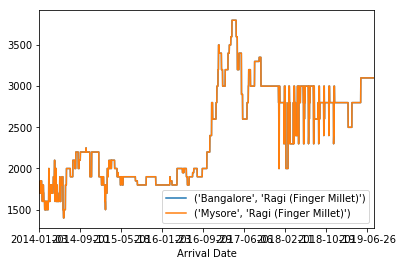

In [138]:
df.plot(x='Arrival Date')

In [139]:
df['Arrival Date'] = pd.to_datetime(df['Arrival Date']).astype('int64')
df.describe()

,Arrival Date,"('Bangalore', 'Ragi (Finger Millet)')","('Mysore', 'Ragi (Finger Millet)')"
count,2.044000e+03,2044.00000,2044.00000
mean,1.476965e+18,2406.38454,2406.38454
std,5.099296e+16,566.48057,566.48057
min,1.388707e+18,1400.00000,1400.00000
25%,1.432836e+18,1900.00000,1900.00000
50%,1.476965e+18,2200.00000,2200.00000
75%,1.521094e+18,3000.00000,3000.00000
max,1.565222e+18,3800.00000,3800.00000


In [140]:
training_set = df.iloc[:,[1,2]].values
training_set

array([[1800., 1800.],
       [1800., 1800.],
       [1800., 1800.],
       ...,
       [3100., 3100.],
       [3100., 3100.],
       [3100., 3100.]])

In [141]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(training_set)

In [142]:
train_size = int(len(scaled) * 0.80)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 1635
test: 409


In [143]:
print(train.shape)
print(test.shape)

(1635, 2)
(409, 2)


In [ ]:
train

In [144]:
def create_dataset(dataset, look_back=32):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print("a:")
        print(a)
        print('Y {}'.format(i + look_back))
        b = dataset[i + look_back]
        print(b)
        #dataset[i + look_back,1:2]
        dataX.append(a)
        dataY.append(b)
    return np.array(dataX), np.array(dataY)

In [145]:
look_back = 17
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

1635 17
0
X 0 to 17
a:
[[0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.125      0.125     ]
 [0.1875     0.1875    ]
 [0.125      0.125     ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.125      0.125     ]
 [0.125      0.125     ]
 [0.125      0.125     ]]
Y 17
[0.125 0.125]
1
X 1 to 18
a:
[[0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.125      0.125     ]
 [0.1875     0.1875    ]
 [0.125      0.125     ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.125      0.125     ]
 [0.125      0.125     ]
 [0.125      0.125     ]
 [0.125      0.125     ]]
Y 18
[0.08333333 0.08333333]
2
X 2 to 19
a:
[[0.16666667 0.16666667]
 [0.16666667 0.1666666

a:
[[0.16666667 0.16666667]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]]
Y 181
[0.25 0.25]
165
X 165 to 182
a:
[[0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]]
Y 182
[0.25 0.25]
166
X 166 to 183
a:
[[0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]
 [0.25 0.25]]
Y 183
[0.25 0.25]
167
X 167 to 184
a:
[[0.25 0.25]


Y 320
[0.33333333 0.33333333]
304
X 304 to 321
a:
[[0.33333333 0.33333333]
 [0.33333333 0.33333333]
 [0.33333333 0.33333333]
 [0.33333333 0.33333333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.33333333 0.33333333]
 [0.33333333 0.33333333]]
Y 321
[0.33333333 0.33333333]
305
X 305 to 322
a:
[[0.33333333 0.33333333]
 [0.33333333 0.33333333]
 [0.33333333 0.33333333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.33333333 0.33333333]
 [0.33333333 0.33333333]
 [0.33333333 0.33333333]]
Y 322
[0.33333333 0.33333333]
306
X 306 to 323
a

Y 404
[0.16666667 0.16666667]
388
X 388 to 405
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.08333333 0.08333333]
 [0.08333333 0.08333333]
 [0.08333333 0.08333333]
 [0.08333333 0.08333333]
 [0.04166667 0.04166667]
 [0.16666667 0.16666667]]
Y 405
[0.16666667 0.16666667]
389
X 389 to 406
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.08333333 0.08333333]
 [0.08333333 0.08333333]
 [0.08333333 0.08333333]
 [0.08333333 0.08333333]
 [0.04166667 0.04166667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]]
Y 406
[0.125 0.125]
390
X 390 to 407
a:
[[0.2083

[0.20833333 0.20833333]
488
X 488 to 505
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]]
Y 505
[0.16666667 0.16666667]
489
X 489 to 506
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.16666667 0.16666667]]
Y 506
[0.16666667 0.16666667]
490
X 490 to 507
a:
[[0.

[0.1875 0.1875]
576
X 576 to 593
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]]
Y 593
[0.1875 0.1875]
577
X 577 to 594
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]
 [0.1875     0.1875    ]]
Y 594
[0.1875 0.1875]
578
X 578 to 595
a:
[[0.20833333 0.20833333]
 [0

664
X 664 to 681
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]]
Y 681
[0.20833333 0.20833333]
665
X 665 to 682
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]]
Y 682
[0.20833333 0.20833333]
666
X 666 to 683
a:
[[0.20833333 0.20833333]
 [0

a:
[[0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]]
Y 793
[0.16666667 0.16666667]
777
X 777 to 794
a:
[[0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]
 [0.16666667 0.16666667]]
Y 794
[0.16666667 0.16666667]
778
X 778 to 795
a:
[[0.16666667 0.16666667]
 [0.16666667 0.16666

Y 887
[0.25 0.25]
871
X 871 to 888
a:
[[0.25       0.25      ]
 [0.25       0.25      ]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.25       0.25      ]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]]
Y 888
[0.25 0.25]
872
X 872 to 889
a:
[[0.25       0.25      ]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.25       0.25      ]
 [0.22916667 0.22916667]
 [0.22916667 0.22916667]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]]
Y 889
[0.25 0.25]
873
X 873 to 890
a:
[[0.22916667 0.22916667]
 [0.22916

 [0.25       0.25      ]]
Y 995
[0.25 0.25]
979
X 979 to 996
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.25       0.25      ]
 [0.25       0.25      ]]
Y 996
[0.25 0.25]
980
X 980 to 997
a:
[[0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.20833333 0.20833333]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]]
Y 997
[0.25 0.25]
981
X 981 to 998
a:
[[0.2083

 [0.5 0.5]]
Y 1078
[0.58333333 0.58333333]
1062
X 1062 to 1079
a:
[[0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.58333333 0.58333333]]
Y 1079
[0.58333333 0.58333333]
1063
X 1063 to 1080
a:
[[0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.5        0.5       ]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]]
Y 1080
[0.58333333 0.5833333

 [1. 1.]]
Y 1196
[1. 1.]
1180
X 1180 to 1197
a:
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Y 1197
[1. 1.]
1181
X 1181 to 1198
a:
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Y 1198
[1. 1.]
1182
X 1182 to 1199
a:
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Y 1199
[1. 1.]
1183
X 1183 to 1200
a:
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Y 1200
[1. 1.]
1184
X 1184 to 1201
a:
[[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]]
Y 1201
[0.91666667 0.91666667]

X 1289 to 1306
a:
[[0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Y 1306
[0.66666667 0.66666667]
1290
X 1290 to 1307
a:
[[0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Y 1307
[0.66666667 0.66666667]
1291
X 1291 to 1308
a:
[[0.66666667 0.6666666

1395
X 1395 to 1412
a:
[[0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Y 1412
[0.66666667 0.66666667]
1396
X 1396 to 1413
a:
[[0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Y 1413
[0.66666667 0.66666667]
1397
X 1397 to 1414
a:
[[0.66666667 0.66

 [0.25       0.25      ]]
Y 1518
[0.58333333 0.58333333]
1502
X 1502 to 1519
a:
[[0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.58333333 0.58333333]]
Y 1519
[0.58333333 0.58333333]
1503
X 1503 to 1520
a:
[[0.58333333 0.58333333]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.25       0.25      ]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]]
Y 1520
[0.375 

 [0.66666667 0.66666667]]
Y 1630
[0.66666667 0.66666667]
1614
X 1614 to 1631
a:
[[0.375      0.375     ]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.5        0.5       ]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Y 1631
[0.66666667 0.66666667]
1615
X 1615 to 1632
a:
[[0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.5        0.5       ]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]]
Y 1632
[0.6666

X 129 to 146
a:
[[0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.41666667 0.41666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]]
Y 146
[0.58333333 0.58333333]
130
X 130 to 147
a:
[[0.58333333 0.58333333]
 [0.41666667 0.41666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.66666667 0.66666667]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]]
Y 147
[0.58333333 0.58333333]
131
X 131 to 148
a:
[[0.41666667 0.41666667]
 [0.666

a:
[[0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]]
Y 234
[0.58333333 0.58333333]
218
X 218 to 235
a:
[[0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]
 [0.58333333 0.58333333]]
Y 235
[0.58333333 0.58333333]
219
X 219 to 236
a:
[[0.58333333 0.58333333]
 [0.58333333 0.58333

[0.70833333 0.70833333]
331
X 331 to 348
a:
[[0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]]
Y 348
[0.70833333 0.70833333]
332
X 332 to 349
a:
[[0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]
 [0.70833333 0.70833333]]
Y 349
[0.70833333 0.70833333]
333
X 333 to 350
a:
[[0.

In [ ]:
y_train[0]

In [146]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1617, 17, 2)
(391, 17, 2)
(1617, 2)
(391, 2)


In [ ]:
#X_test

In [147]:
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],X_train.shape[2] ))
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], X_test.shape[2]))
print(X_train.shape)
print(X_test.shape)

(1617, 17, 2)
(391, 17, 2)


In [148]:
X_train = X_train.reshape((X_train.shape[0], -1), order='F')
X_test = X_test.reshape((X_test.shape[0], -1), order='F')

In [149]:
print(X_train.shape)
print(X_test.shape)

(1617, 34)
(391, 34)


In [150]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state = 0)
#model = DecisionTreeClassifier(criterion = 'entropy' )
model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=0, splitter='best')

In [151]:
from sklearn import metrics

y_predict = model.predict(X_test)
#acc=metrics.accuracy_score(y_test, y_predict)
# acc

# R2 of the prediction, maximum value can be 1
score = model.score(X_test, y_test)
print (score)

0.583069127259007


In [ ]:
# model2 = DecisionTreeClassifier(max_depth=5,criterion='entropy', min_samples_leaf=4, random_state=1)
# model2.fit(X_train, y_train)
# y_predict2 = model2.predict(X_test)
# acc = metrics.accuracy_score(y_test, y_predict2)
# acc

In [ ]:
# Rf_model = RandomForestClassifier(n_estimators=5,criterion='entropy',max_depth=5,random_state=0 )
# Rf_model.fit(X_train, y_train)
# y_predict_Rf = Rf_model.predict(X_test)
# acc = metrics.accuracy_score(y_test, y_predict_Rf)
# acc

In [152]:
from sklearn.ensemble import RandomForestRegressor 
regressor = RandomForestRegressor(n_estimators = 5, random_state = 0) 
regressor.fit(X_train, y_train) 

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [153]:
y_predict_Rf = regressor.predict(X_test)
regressor.score(X_test, y_test)

0.5719629215575592

In [ ]:
# cr = metrics.classification_report(y_test, y_predict_Rf)
# print(cr)